<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Clustering-agglomératif" data-toc-modified-id="Clustering-agglomératif-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Clustering agglomératif</a></span></li></ul></div>

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("airline_satisfaction_final.csv", index_col = 0,
)

In [3]:
df.head()

,Age,Flight Distance,Departure Delay in Minutes,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Business travel,Class_Business,Class_Eco Plus,satisfaction_satisfied,Inflight wifi service,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,0.076923,0.086632,0.015704,1.0,1.0,0.0,0.0,1.0,0.0,0.6,...,1.0,0.6,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0
1,0.230769,0.041195,0.000628,1.0,0.0,1.0,1.0,0.0,0.0,0.6,...,0.2,0.6,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2
2,0.243590,0.224354,0.000000,0.0,1.0,1.0,1.0,0.0,1.0,0.4,...,1.0,1.0,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0
3,0.230769,0.107229,0.006910,0.0,1.0,1.0,1.0,0.0,0.0,0.4,...,0.4,0.4,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4
4,0.692308,0.036955,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,0.6,...,0.8,1.0,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6


In [4]:
df.shape

(129880, 23)

In [5]:
df.columns

Index(['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Gender_Male',
       'Customer Type_Loyal Customer', 'Type of Travel_Business travel',
       'Class_Business', 'Class_Eco Plus', 'satisfaction_satisfied',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness'],
      dtype='object')

In [6]:
X = df[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Gender_Male',
       'Customer Type_Loyal Customer', 'Type of Travel_Business travel',
       'Class_Business', 'Class_Eco Plus',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness','satisfaction_satisfied']]

In [7]:
from sklearn.cluster import KMeans
import numpy as np

# Appliquez K-means pour obtenir les centres des clusters
kmeans = KMeans(n_clusters=5)  # Vous pouvez ajuster le nombre de clusters
kmeans.fit(X)
cluster_centers = kmeans.cluster_centers_

# Déterminez le nombre d'échantillons à générer autour de chaque centre de cluster
n_samples_per_cluster = 20

# Initialisez une liste pour stocker les échantillons échantillonnés
sampled_data = []

# Pour chaque centre de cluster, échantillonnez des points autour de lui
for center in cluster_centers:
    # Générez des échantillons à partir d'une distribution normale centrée sur le centre du cluster
    new_samples = np.random.multivariate_normal(center, np.eye(len(center)), n_samples_per_cluster)
    sampled_data.append(new_samples)

# Concaténez les échantillons échantillonnés pour former le nouvel ensemble de données échantillonné
sampled_data = np.concatenate(sampled_data, axis=0)

/home/estelle/miniconda3/envs/rlnavenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
sampled_data.shape

(100, 23)

In [9]:
X = sampled_data

In [10]:
X.shape

(100, 23)

## Clustering agglomératif

In [11]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [12]:
clustering = AgglomerativeClustering(n_clusters=3, metric='manhattan', linkage='complete')
assignment = clustering.fit_predict(X)

In [13]:
clustering.labels_

array([1, 1, 2, 0, 1, 2, 1, 0, 2, 0, 0, 2, 0, 1, 1, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0, 1,
       1, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 0, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1,
       1, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 0])

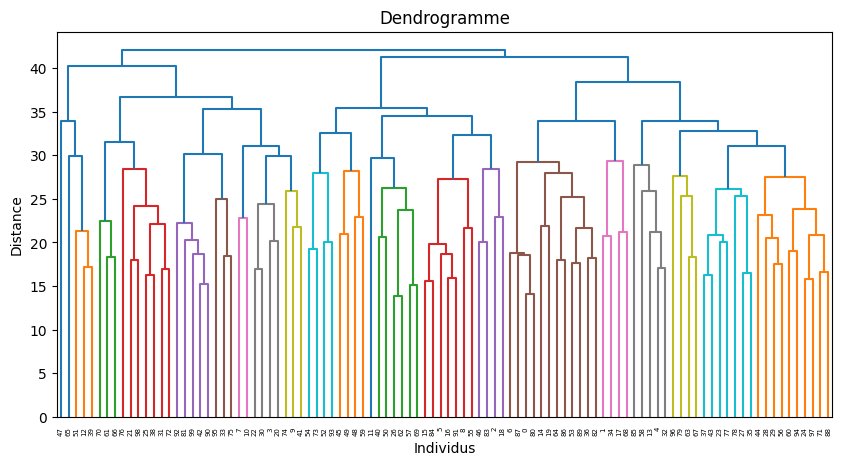

In [14]:
linkage_matrix = linkage(X, method='complete', metric='cityblock')

plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogramme')
plt.xlabel('Individus')
plt.ylabel('Distance')
plt.show()

In [23]:
from scipy.cluster.hierarchy import fcluster
import pandas as pd

# Supposons que vous avez déjà défini X et df
linkage_matrix = linkage(X, method='complete', metric='cityblock')

# Seuil pour la formation des clusters
threshold = 36

# Assignation des clusters en fonction du seuil
clusters = fcluster(linkage_matrix, threshold, criterion='distance')

# Affichage de la composition des clusters avec les numéros des individus
for cluster_num in range(1, max(clusters) + 1):
    print(f'Cluster {cluster_num}:')
    for i, cluster_label in enumerate(clusters):
        if cluster_label == cluster_num:
            print(f'Individu {i + 1}')  # Index des individus, commence généralement à 1
    print()

# Création d'un DataFrame pour chaque cluster
dfs = {}
for cluster_num in range(1, max(clusters) + 1):
    cluster_indices = [i for i, cluster_label in enumerate(clusters) if cluster_label == cluster_num]
    cluster_df = df.iloc[cluster_indices]
    dfs[f'Cluster_{cluster_num}'] = cluster_df

# Exemple d'accès aux DataFrames de chaque cluster
print("Accès au DataFrame du premier cluster:")
print(dfs["Cluster_1"].head())

Cluster 1:
Individu 13
Individu 40
Individu 48
Individu 52
Individu 66

Cluster 2:
Individu 22
Individu 26
Individu 32
Individu 39
Individu 62
Individu 67
Individu 71
Individu 73
Individu 77
Individu 99

Cluster 3:
Individu 4
Individu 8
Individu 10
Individu 11
Individu 21
Individu 23
Individu 31
Individu 34
Individu 42
Individu 43
Individu 75
Individu 76
Individu 82
Individu 91
Individu 93
Individu 96
Individu 100

Cluster 4:
Individu 3
Individu 6
Individu 9
Individu 12
Individu 16
Individu 17
Individu 19
Individu 27
Individu 41
Individu 46
Individu 47
Individu 49
Individu 50
Individu 51
Individu 53
Individu 55
Individu 56
Individu 58
Individu 60
Individu 63
Individu 70
Individu 74
Individu 84
Individu 85
Individu 92
Individu 94

Cluster 5:
Individu 1
Individu 2
Individu 7
Individu 15
Individu 18
Individu 20
Individu 35
Individu 37
Individu 54
Individu 65
Individu 69
Individu 81
Individu 83
Individu 87
Individu 88
Individu 90

Cluster 6:
Individu 5
Individu 14
Individu 24
Individu 25
I

In [24]:
dfs["Cluster_1"].shape

(5, 23)

In [25]:
dfs["Cluster_2"].shape

(10, 23)

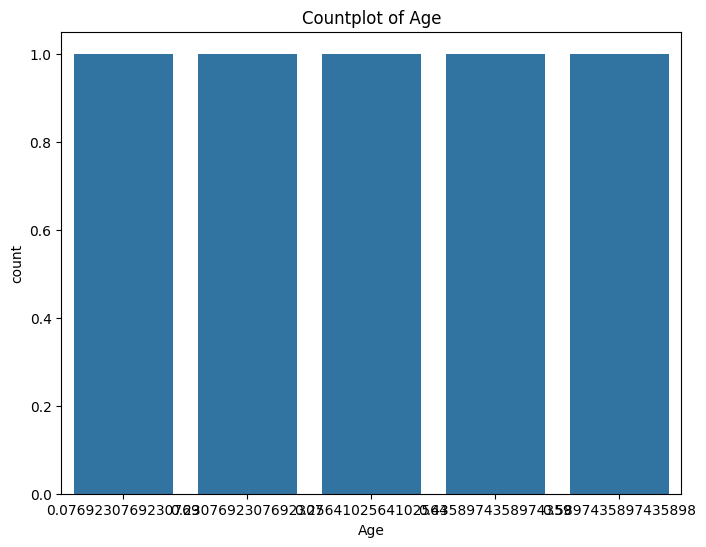

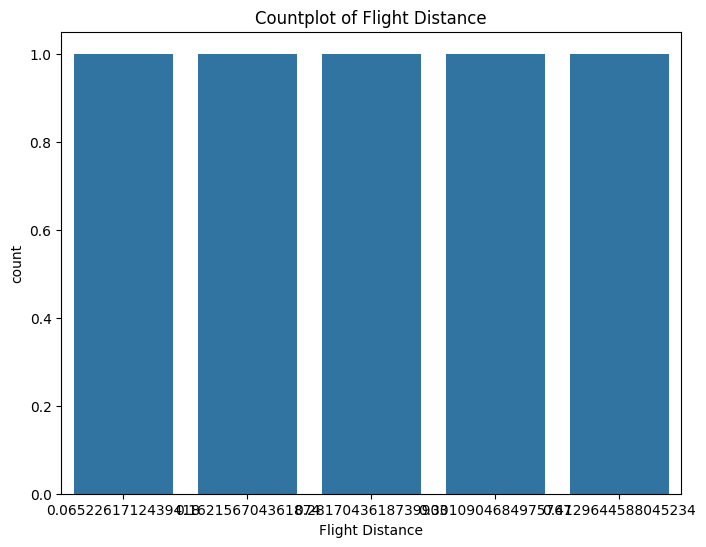

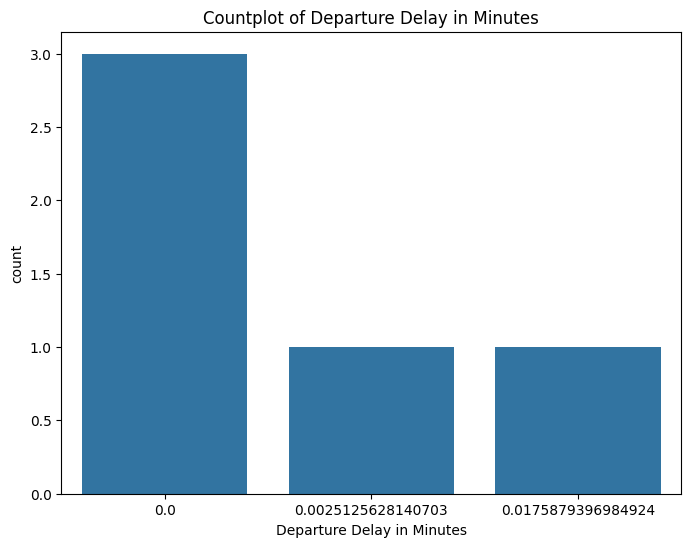

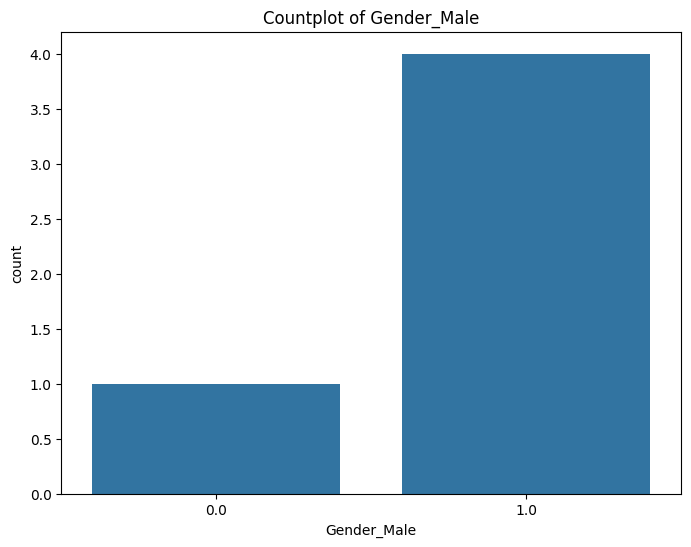

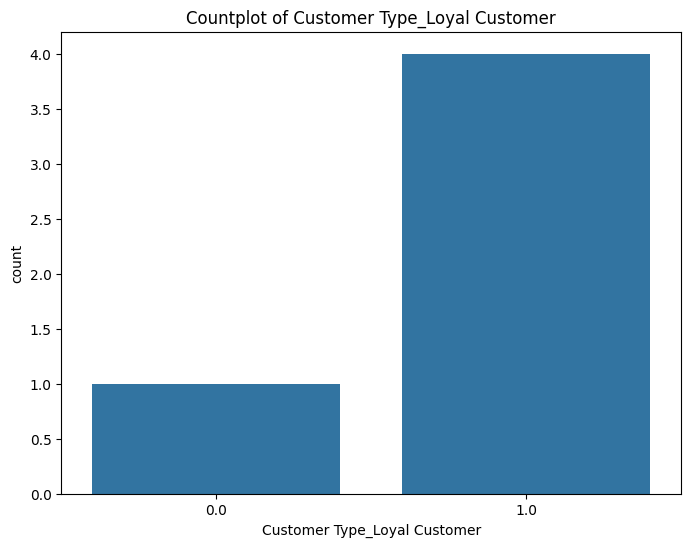

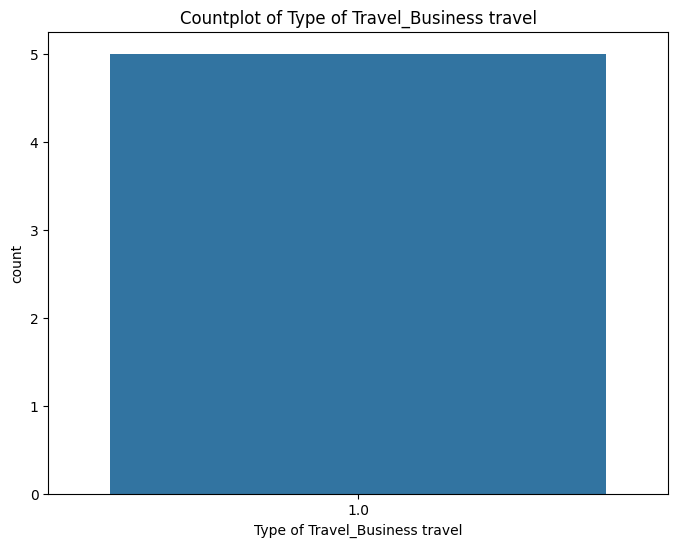

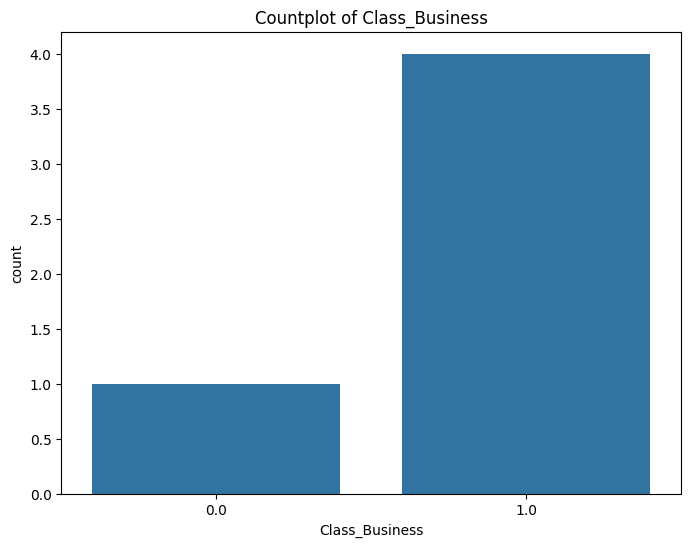

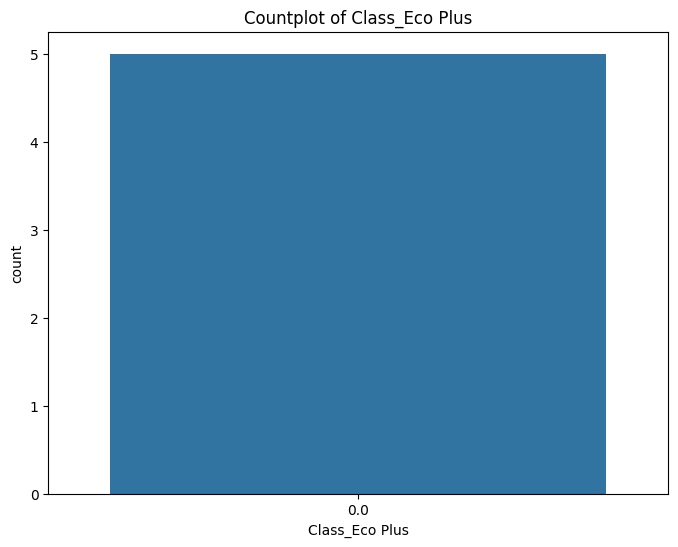

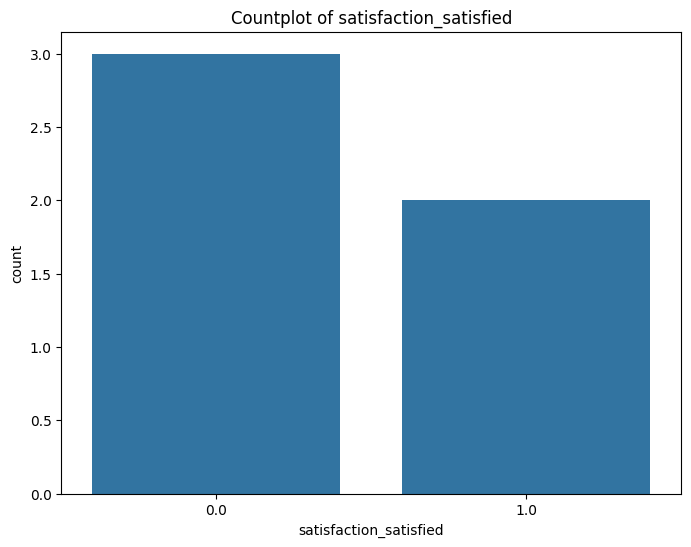

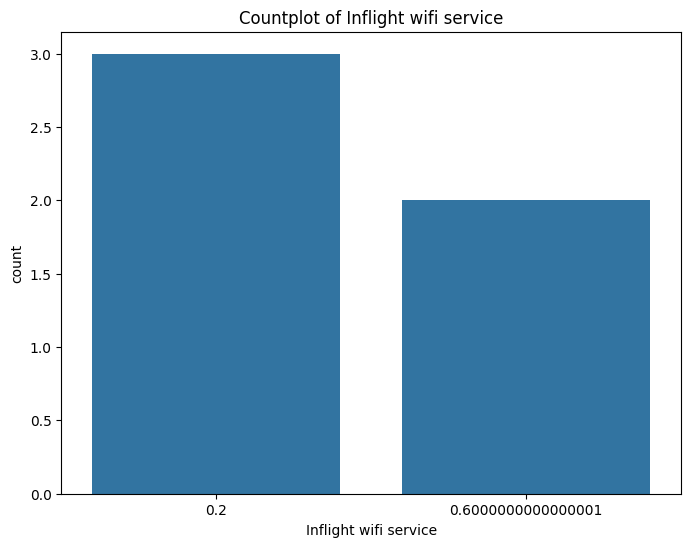

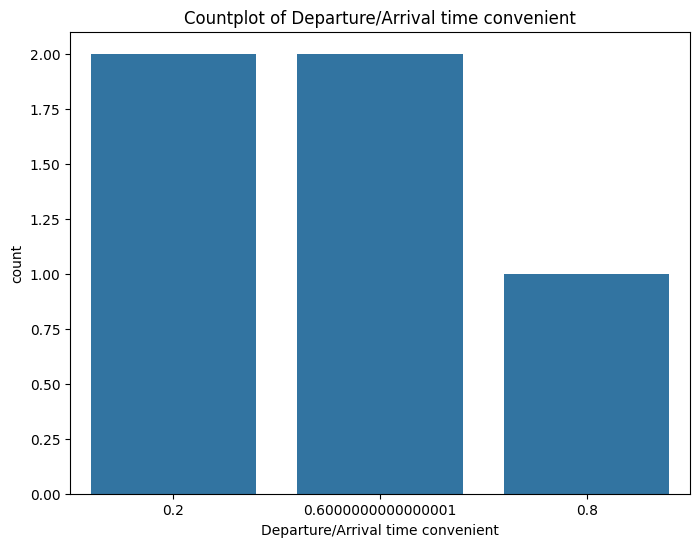

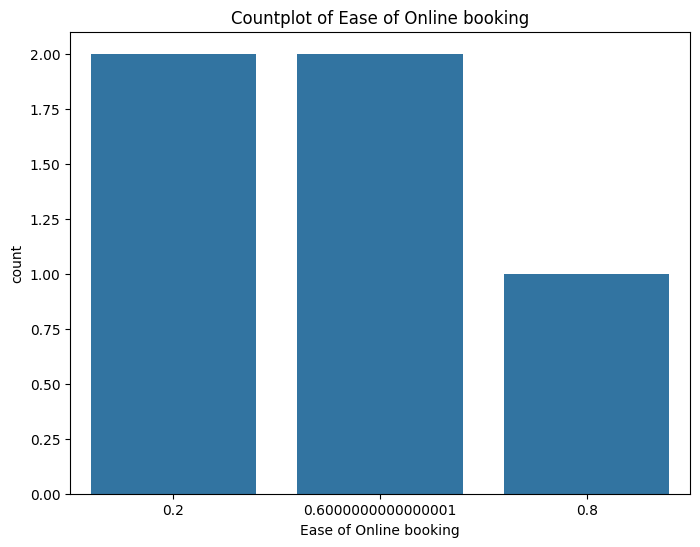

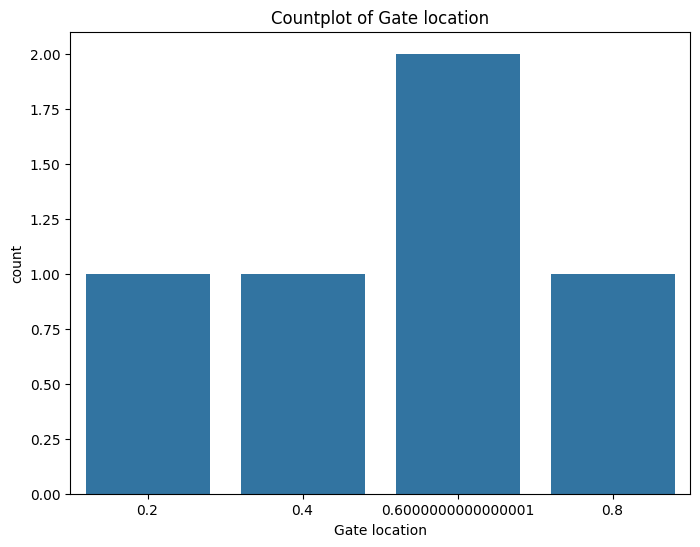

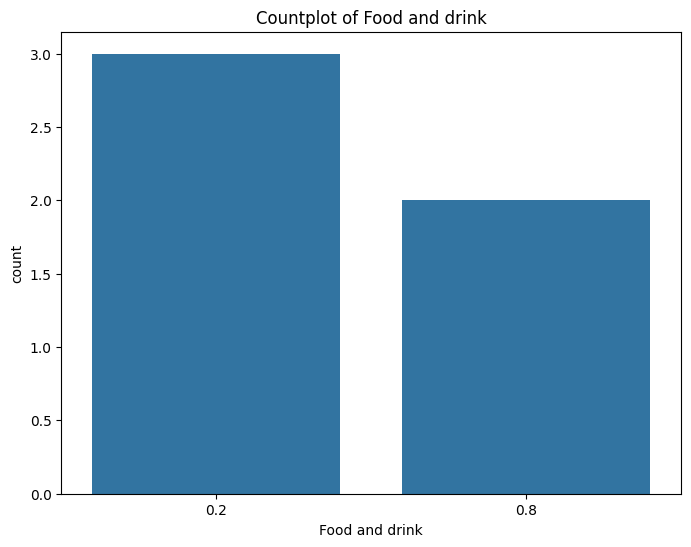

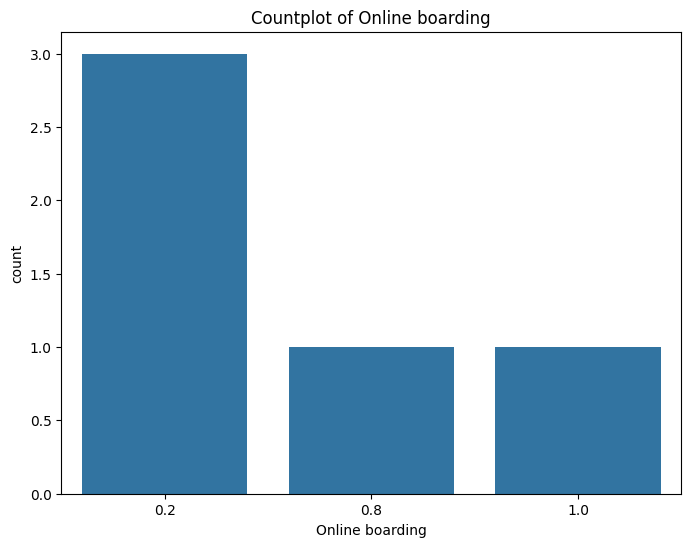

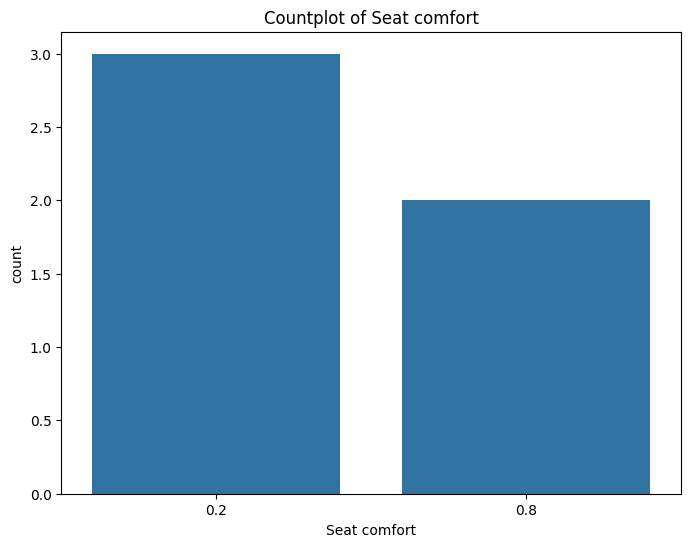

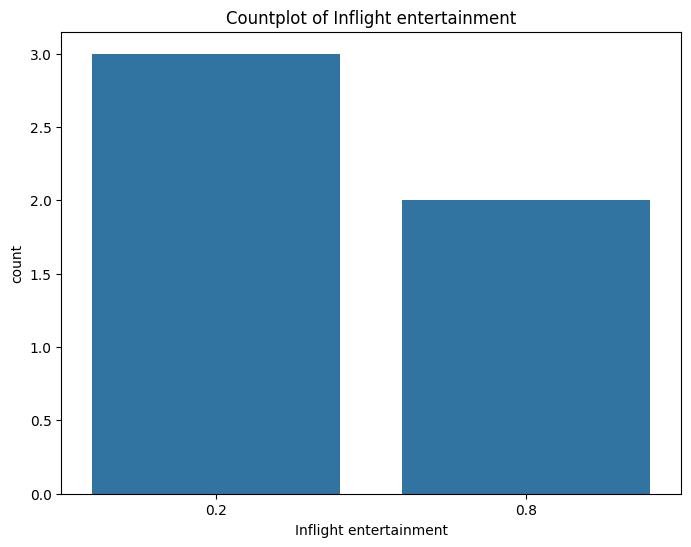

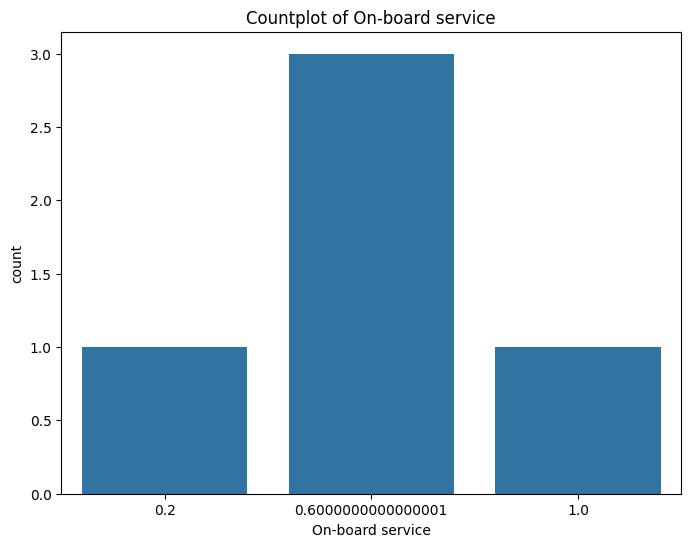

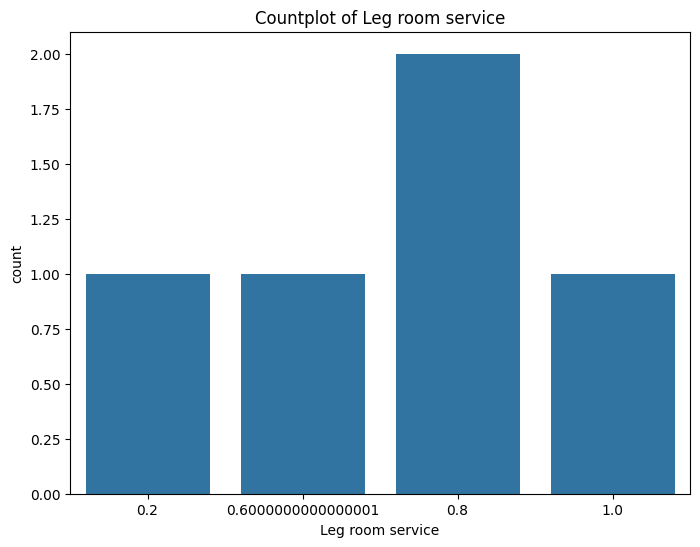

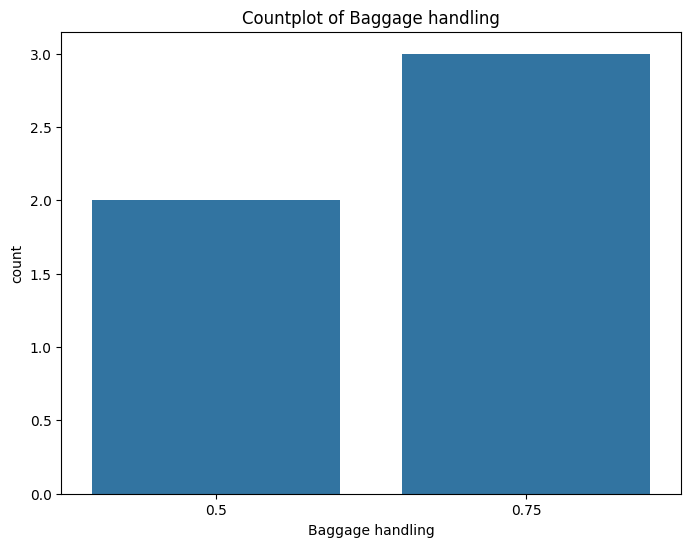

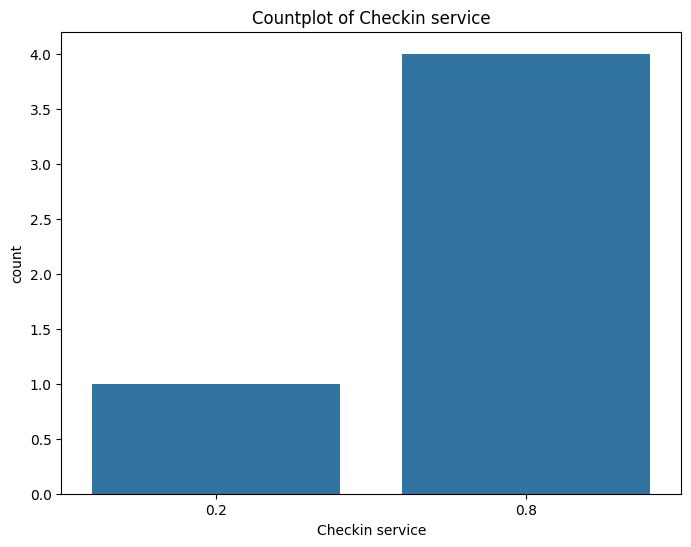

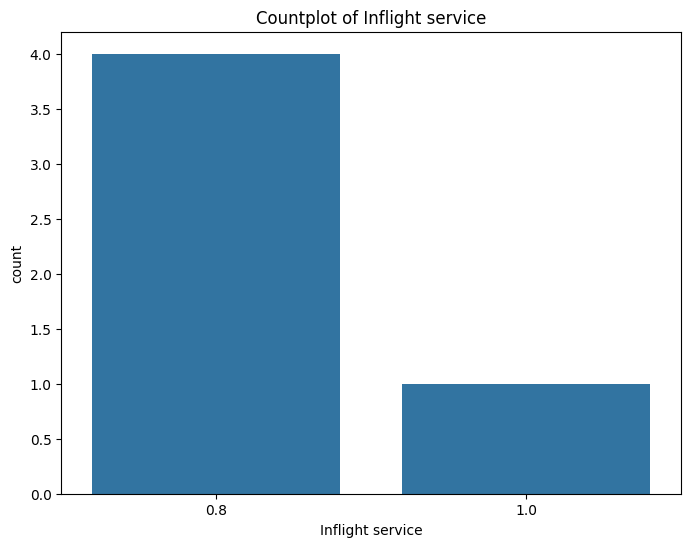

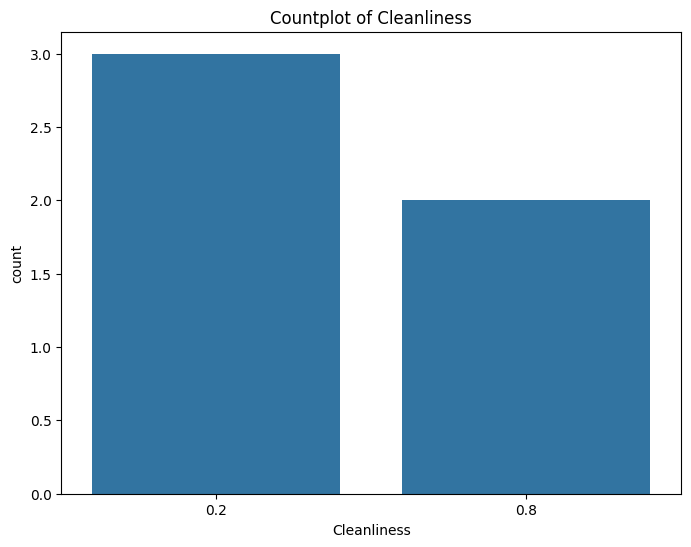

In [28]:
for i, col in enumerate(dfs["Cluster_1"].columns):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=dfs["Cluster_1"], x=col)
    plt.title(f'Countplot of {col}')
    #plt.savefig(f'/home/estelle/robotlearn/airline_satisfaction/figures/histogramme_{col}.png')
    plt.show()

In [58]:
clusters=["Cluster_1","Cluster_2","Cluster_3","Cluster_4"]
for cluster in clusters :
    print(f"============= {cluster} \n {dfs[cluster].describe()}")

============= Cluster_1 
              Age  Flight Distance  Departure Delay in Minutes  Gender_Male  \
count  18.000000        18.000000                   18.000000    18.000000   
mean    0.406695         0.262094                    0.005304     0.500000   
std     0.148069         0.218319                    0.010414     0.514496   
min     0.166667         0.011914                    0.000000     0.000000   
25%     0.365385         0.072597                    0.000000     0.000000   
50%     0.403846         0.247678                    0.000000     0.500000   
75%     0.496795         0.312904                    0.005810     1.000000   
max     0.666667         0.739297                    0.039573     1.000000   

       Customer Type_Loyal Customer  Type of Travel_Business travel  \
count                     18.000000                       18.000000   
mean                       0.722222                        0.944444   
std                        0.460889                       

In [1]:
'''linkage_matrix = linkage(X, method='single', metric='cityblock')

# Tracé du dendrogramme
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogramme')
plt.xlabel('Individus')
plt.ylabel('Distance')
plt.show()'''

"linkage_matrix = linkage(X, method='single', metric='cityblock')\n\n# Tracé du dendrogramme\nplt.figure(figsize=(10, 5))\ndendrogram(linkage_matrix)\nplt.title('Dendrogramme')\nplt.xlabel('Individus')\nplt.ylabel('Distance')\nplt.show()"

In [2]:
'''linkage_matrix = linkage(X, method='average', metric='cityblock')

# Tracé du dendrogramme
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogramme')
plt.xlabel('Individus')
plt.ylabel('Distance')
plt.show()'''

"linkage_matrix = linkage(X, method='average', metric='cityblock')\n\n# Tracé du dendrogramme\nplt.figure(figsize=(10, 5))\ndendrogram(linkage_matrix)\nplt.title('Dendrogramme')\nplt.xlabel('Individus')\nplt.ylabel('Distance')\nplt.show()"